<a href="https://colab.research.google.com/github/oliveralbrecht94/ATDIT2/blob/master/Solution/Task%20E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [172]:
import tensorflow as tf
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt
from scipy import stats
import scipy.spatial.distance

plt.set_cmap(None)
plt.gray()

<Figure size 432x288 with 0 Axes>

In [0]:
cifar_train = tf.keras.datasets.cifar10.load_data()[0]
train_images, train_labels = cifar_train[0], cifar_train[1]

In [0]:
cifar_test = tf.keras.datasets.cifar10.load_data()[1]
test_images, test_labels = cifar_test[0], cifar_test[1]

In [0]:
train_labels_list = []
for i in range(train_labels.shape[0]):
    train_labels_list.append(train_labels[i][0])

In [0]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [0]:
y_train = train_labels
y_test = test_labels

# Images into grey

In [0]:
x_train_gray = []

for i in range(train_images.shape[0]):
    x_train_gray.append(rgb2gray(train_images[i]))
    
x_train_gray = np.array(x_train_gray)

In [0]:
x_test_gray = []

for i in range(test_images.shape[0]):
    x_test_gray.append(rgb2gray(test_images[i]))
    
x_test_gray = np.array(x_test_gray)

In [180]:
train_images.shape

(50000, 32, 32, 3)

# Preparing Dataset

In [181]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
n_train = train_images.shape[0]
n_test = test_images.shape[0]
m = train_images.shape[1]**2


# Transform to 1D vector from each matrix with the pixels of an image in order to calculate distances.
gray_image = x_train_gray.reshape([n_train, m])
gray_test_image = x_test_gray.reshape([n_test, m])
gray_image.shape

(50000, 1024)

In [182]:
size_image_sample = 20000
index = np.random.randint(n_train, size = size_image_sample) 
image_sample = gray_image[index]
labels_sample = train_labels[index]
image_sample.shape

(20000, 1024)

In [0]:
size_test_sample = 1000
index = np.random.randint(n_test, size = size_test_sample)
test_image_sample = gray_test_image[index]
test_labels_sample = test_labels[index]

In [0]:
labels_sample = labels_sample.reshape([size_image_sample])
test_labels_sample = test_labels_sample.reshape([size_test_sample])

# KNN - Setting up K and calculate distances as in B

In [0]:
# setting up the k value 
#k = 2 
#k = 4
#k = 8 
k = 15
# calculating the distance between each vector in dependency of k and save it in an arra
distances = scipy.spatial.distance.cdist(image_sample, test_image_sample, metric='euclid')
# calculates the next k points around the vector
index_nearest = np.argpartition(distances, k, axis = 0)[:k] 

In [186]:
# saves the neighbors of the vector in dependency of k
knn_neighbors = labels_sample[index_nearest] 
# show the neighbors
print(knn_neighbors)

[[0 6 2 ... 4 2 2]
 [0 2 2 ... 2 3 8]
 [2 6 3 ... 2 2 2]
 ...
 [0 0 6 ... 2 2 4]
 [8 2 6 ... 4 3 2]
 [0 2 6 ... 2 6 2]]


In [0]:
# is looking for the most frequent value in the array/vector
knn_result = stats.mode(knn_neighbors)[0]
knn_result = knn_result[0]
# shows the most frequent value
#knn_result

# Calculating error rate as in B

In [0]:
errors = 0
# compares the two arrays and is looking for matches of the values? Right = true / Wrong = false
error_rate_matrix = (test_labels_sample == knn_result)
for b in error_rate_matrix:
    if b == False:
        errors += 1


In [189]:
np.unique(test_labels_sample, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([100, 105, 108, 106,  94,  87, 103,  91,  99, 107]))

In [190]:
# Calculation of the error rate
_rate = (errors / size_test_sample) * 100. 
print("Global error rate for k = " +str(k)+" "+str(_rate) + " %")

Global error rate for k = 15 74.4 %


Global error rate for k = 2 75.0 %


Global error rate for k = 4 74.8 %

Global error rate for k = 8 73.1 %

# Get the individual errorrate as in B

In [0]:
indi_error ={0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
total = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
for i in range(len(test_labels_sample)):
  if test_labels_sample[i]!= knn_result[i]:
    # saves the fact, that the picture was wrong
    indi_error[test_labels_sample[i]] +=1
    total[test_labels_sample[i]] +=1
  else:
      # saves the fact, that the picture was right
    total[test_labels_sample[i]] +=1

In [0]:
errorrate = {}
for j in range(0,10):
  errorrate[j] = (indi_error[j]/total[j]) * 100
  #print(errorrate[j])


In [55]:
for i in range(len(errorrate)):
  print("Error rate for "+ str(class_names[i]) +" is "+ str(errorrate[i])+"%")

Error rate for airplane is 72.44897959183673%
Error rate for automobile is 77.55102040816327%
Error rate for bird is 64.51612903225806%
Error rate for cat is 84.5360824742268%
Error rate for deer is 55.04587155963303%
Error rate for dog is 81.11111111111111%
Error rate for frog is 82.82828282828282%
Error rate for horse is 89.7196261682243%
Error rate for ship is 47.61904761904761%
Error rate for truck is 88.46153846153845%


**indiv error rate for k = 2:**

* Error rate for airplane is 58.16326530612245%
* Error rate for automobile is 77.55102040816327%
* Error rate for bird is 63.44086021505376%
* Error rate for cat is 76.28865979381443%
* Error rate for deer is 68.80733944954129%
* Error rate for dog is 87.77777777777777%
* Error rate for frog is 91.91919191919192%
* Error rate for horse is 91.58878504672897%
* Error rate for ship is 65.71428571428571%
* Error rate for truck is 94.23076923076923%

**indiv error rate for k = 4**

* Error rate for airplane is 64.28571428571429%
* Error rate for automobile is 81.63265306122449%
* Error rate for bird is 64.51612903225806%
* Error rate for cat is 83.50515463917526%
* Error rate for deer is 55.96330275229357%
* Error rate for dog is 86.66666666666667%
* Error rate for frog is 87.87878787878788%
* Error rate for horse is 85.98130841121495%
* Error rate for ship is 51.42857142857142%
* Error rate for truck is 88.46153846153845%

**indiv error rate for k = 8**

* Error rate for airplane is 72.44897959183673%
* Error rate for automobile is 77.55102040816327%
* Error rate for bird is 64.51612903225806%
* Error rate for cat is 84.5360824742268%
* Error rate for deer is 55.04587155963303%
* Error rate for dog is 81.11111111111111%
* Error rate for frog is 82.82828282828282%
* Error rate for horse is 89.7196261682243%
* Error rate for ship is 47.61904761904761%
* Error rate for truck is 88.46153846153845%

# How does the choice of k influence the results? as in B
 
The global error rate shows that the algorithm gets better with increasing k, at least in the range of 2,4,8. At k = 15, the global error rate is 74,4 %. This shows us that it is not the case that a high k minimizes the error rate. We simply assume that the algorithm is not suitable for this application and so k cannot improve the result in a huge way.

# **Does knn work similarly good?** 

Knn works at CIFAR extremely inaccurate as you can see from the high error rates. With every test, the error rate is over 73%, while with MNIST, the error rate is a few percent. See 10 wrong predictions:



In [191]:
count = 0
false_pictures = (test_labels_sample == knn_result)
for i in range(0, 10):
    if false_pictures[i] == False:
        count += 1
        print("Picture number " + str(count))
        print("Truth number: " + str(test_labels_sample[i])+" -> "+str (class_names[test_labels_sample[i]]))
        #plt.imshow(rgb2gray(train_images[i]))
        print("predicted number: " + str(knn_result[i])+" -> " +str (class_names[i]))
        print("____________")

        
        
        #plt.show()
             

Picture number 1
Truth number: 2 -> bird
predicted number: 0 -> airplane
____________
Picture number 2
Truth number: 3 -> cat
predicted number: 2 -> automobile
____________
Picture number 3
Truth number: 2 -> bird
predicted number: 6 -> bird
____________
Picture number 4
Truth number: 6 -> frog
predicted number: 3 -> cat
____________
Picture number 5
Truth number: 3 -> cat
predicted number: 4 -> dog
____________
Picture number 6
Truth number: 9 -> truck
predicted number: 8 -> frog
____________
Picture number 7
Truth number: 3 -> cat
predicted number: 2 -> horse
____________
Picture number 8
Truth number: 9 -> truck
predicted number: 8 -> truck
____________


# Kmeans - Setting up k and calculating distances as in C

In [0]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
clusters = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5", "Cluster 6", "Cluster 7", "Cluster 8", "Cluster 9"]

In [105]:
k = 10
# init centroids
idx_centroid = np.random.randint(size_image_sample, size=k)
centroids = image_sample[idx_centroid]


idx_centroid

array([ 9381,  2754,  7228,  7163,  4089, 19421,  4575,   707, 10188,
        8213])

In [106]:
# calculate distances
dists = scipy.spatial.distance.cdist(image_sample, centroids, metric='euclid')
dists.shape

(20000, 10)

In [107]:
#find nearest ones
labels = np.argmin(dists, axis=1)
labels

array([0, 7, 0, ..., 7, 7, 7])

In [108]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
# get new centroids
list = [image_sample[labels == i].mean(0) for i in range(k)]
centroids = np.stack(list)

In [0]:
# do the iteraions of kmean
#iteration = 10
iteration = 100
#iteration = 1000
for j in range(iteration):
    
    # calc distances
    dists = scipy.spatial.distance.cdist(image_sample, centroids, metric = 'euclid')
    
    # label according to nearest centroids
    centroid_labels = np.argmin(dists, axis = 1)
    
    # get new centroids
    centroid_list = [image_sample[centroid_labels == i].mean(0) for i in range(k)]
    centroids = np.stack(centroid_list)

In [0]:
# select all data in cluster_n
cluster_0 = image_sample[labels == 0]
cluster_1 = image_sample[labels == 1]
cluster_2 = image_sample[labels == 2]
cluster_3 = image_sample[labels == 3]
cluster_4 = image_sample[labels == 4]
cluster_5 = image_sample[labels == 5]
cluster_6 = image_sample[labels == 6]
cluster_7 = image_sample[labels == 7]
cluster_8 = image_sample[labels == 8]
cluster_9 = image_sample[labels == 9]



In [0]:
labels_cluster_0 = labels_sample[centroid_labels == 0]
labels_cluster_1 = labels_sample[centroid_labels == 1]
labels_cluster_2 = labels_sample[centroid_labels == 2]
labels_cluster_3 = labels_sample[centroid_labels == 3]
labels_cluster_4 = labels_sample[centroid_labels == 4]
labels_cluster_5 = labels_sample[centroid_labels == 5]
labels_cluster_6 = labels_sample[centroid_labels == 6]
labels_cluster_7 = labels_sample[centroid_labels == 7]
labels_cluster_8 = labels_sample[centroid_labels == 8]
labels_cluster_9 = labels_sample[centroid_labels == 9]

In [113]:
print("Numbers in Cluster 0: "+str(np.unique(labels_cluster_0)))
print("Numbers in Cluster 1: "+str(np.unique(labels_cluster_1)))
print("Numbers in Cluster 2: "+str(np.unique(labels_cluster_2)))
print("Numbers in Cluster 3: "+str(np.unique(labels_cluster_3)))
print("Numbers in Cluster 4: "+str(np.unique(labels_cluster_4)))
print("Numbers in Cluster 5: "+str(np.unique(labels_cluster_5)))
print("Numbers in Cluster 6: "+str(np.unique(labels_cluster_6)))
print("Numbers in Cluster 7: "+str(np.unique(labels_cluster_7)))
print("Numbers in Cluster 8: "+str(np.unique(labels_cluster_8)))
print("Numbers in Cluster 9: "+str(np.unique(labels_cluster_9)))

Numbers in Cluster 0: [0 1 2 3 4 5 6 7 8 9]
Numbers in Cluster 1: [0 1 2 3 4 5 6 7 8 9]
Numbers in Cluster 2: [0 1 2 3 4 5 6 7 8 9]
Numbers in Cluster 3: [0 1 2 3 4 5 6 7 8 9]
Numbers in Cluster 4: [0 1 2 3 4 5 6 7 8 9]
Numbers in Cluster 5: [0 1 2 3 4 5 6 7 8 9]
Numbers in Cluster 6: [0 1 2 3 4 5 6 7 8 9]
Numbers in Cluster 7: [0 1 2 3 4 5 6 7 8 9]
Numbers in Cluster 8: [0 1 2 3 4 5 6 7 8 9]
Numbers in Cluster 9: [0 1 2 3 4 5 6 7 8 9]


In [0]:
def percentagecalculator(labels_cluster, class_names, c):
    cluster = stats.mode(labels_cluster)
    labels, count = np.unique(labels_cluster, return_counts=True)
    highest_idx = 0
    for i in range(len(labels)):
      if count[i] > count[highest_idx]:
        highest_idx = i
    per = float(cluster[1]) / float(labels_cluster.shape[0]) * 100
    print("Cluster " + str(c) + " contains " + str(round(per, 2)) + " %  " + str(labels[highest_idx]))

In [0]:
percentagecalculator(labels_cluster_0, class_names, 0)
percentagecalculator(labels_cluster_1, class_names, 1)
percentagecalculator(labels_cluster_2, class_names, 2)
percentagecalculator(labels_cluster_3, class_names, 3)
percentagecalculator(labels_cluster_4, class_names, 4)
percentagecalculator(labels_cluster_5, class_names, 5)
percentagecalculator(labels_cluster_6, class_names, 6)
percentagecalculator(labels_cluster_7, class_names, 7)
percentagecalculator(labels_cluster_8, class_names, 8)
percentagecalculator(labels_cluster_9, class_names, 9)

Cluster 0 contains 19.09 %  4
Cluster 1 contains 17.09 %  7
Cluster 2 contains 16.32 %  1
Cluster 3 contains 19.83 %  6
Cluster 4 contains 28.11 %  0
Cluster 5 contains 30.26 %  8
Cluster 6 contains 30.57 %  9
Cluster 7 contains 19.14 %  7
Cluster 8 contains 14.94 %  2
Cluster 9 contains 22.0 %  5


# Does each number have a cluster and what ist the percentage of each cluster? as in C


**K-means for 10 iterations**
* Cluster 0 contains 33.53 %  ships
* Cluster 1 contains 33.27 %  airplanes
* Cluster 2 contains 28.5 %  trucks
* Cluster 3 contains 15.27 %  birds
* Cluster 4 contains 17.51 %  horses
* Cluster 5 contains 18.79 %  deers
* Cluster 6 contains 14.2 %  dogs
* Cluster 7 contains 19.01 %  frogs
* Cluster 8 contains 17.25 %  dogs
* Cluster 9 contains 17.37 %  automobiles

**Does each number have a cluster?**

*cats is not assigned to any cluster and dogs is assigned twice*

**K-means for 100 iterations**

* Cluster 0 contains 32.97 %  ships
* Cluster 1 contains 32.46 %  airplanes
* Cluster 2 contains 30.45 %  trucks
* Cluster 3 contains 15.34 %  birds
* Cluster 4 contains 18.81 %  horses
* Cluster 5 contains 19.61 %  deers
* Cluster 6 contains 15.34 %  dogs
* Cluster 7 contains 19.85 %  frogs
* Cluster 8 contains 19.54 %  dogs
* Cluster 9 contains 14.77 %  frogs

**Does each number have a cluster?**


*automobiles and cats are not assigned to any cluster and dogs and frogs are assigned twice*

**K-means for 1000 iterations**


* Cluster 0 contains 32.97 %  ships
* Cluster 1 contains 32.46 %  airplanes
* Cluster 2 contains 30.45 %  trucks
* Cluster 3 contains 15.34 %  birds
* Cluster 4 contains 18.81 %  horses
* Cluster 5 contains 19.61 %  deers
* Cluster 6 contains 15.34 %  dogs
* Cluster 7 contains 19.85 %  frogs
* Cluster 8 contains 19.54 %  dogs
* Cluster 9 contains 14.77 %  frogs





**Does each number have a cluster?**

*automobiles and cats are not assigned to any cluster and dogs and frogs are assigned twice*

# Does k-means work similarly good? 



kmeans also has a high error rate, so you can't say that kmeans works well or fits well on the CIFAR dataset. The cluster majority for CIFAR is just MAX 30% while for MNIST it is over 90%. 


# CIFAR understandingas in D

As with the MNIST dataset, some structures/classes can be better classified with KNN and K-means than others. As with MNIST, this is due to the structure or uniqueness of the images. In the following, a few pictures are shown for clarification purposes

It is to be expected that trucks (only for kmeans), ships and planes (for both algorithms) in particular can be assigned relatively well due to their structure and characteristics. Trucks are very angular due to their design, ships are very elongated and planes are very distinctive due to their wings. This expectation also shows us the error rate at knn and the result in the allocation of clusters at Kmeans. For ships and aircrafts the error rate at KNN (average) was always the lowest.  For K-means, too, aircraft, ships and additionally trucks belong to the classes with the highest values with over 30% in their own cluster.

Especially animals such as dogs, deer and horses cannot be easily distinguished in this resolution and therefore cannot be optimally assigned (similar values).Particularly here, fine characteristics that distinguish the individual animals (ears, nose, etc.) are lost due to the dissolution.  Knn and kmeans show that the animal classes can be assigned badly in reality.

Here some exmaples which are very complicated to assign:

It is a deer, but it could be also a dog


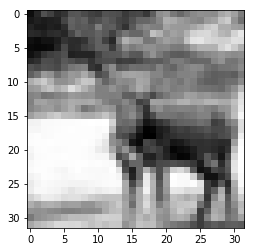

In [148]:
plt.imshow(rgb2gray(train_images[1001]))
label_index = int(train_labels[1001])
print("It is a "+ class_names[label_index] +", but it could be also a dog")
plt.show()


It is a deer, but it could be everything


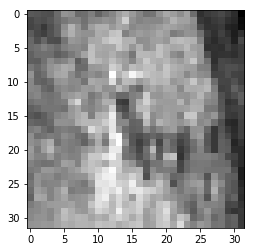

In [151]:
plt.imshow(rgb2gray(train_images[10]))
label_index = int(train_labels[10])
print("It is a "+ class_names[label_index] +", but it could be everything")
plt.show()

It is a dog, but it could be also a cat


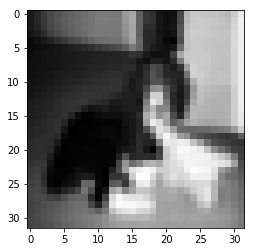

In [157]:
plt.imshow(rgb2gray(train_images[128]))
label_index = int(train_labels[128])
print("It is a "+ class_names[label_index] +", but it could be also a cat")
plt.show()

Here some exmaples which are very easy to assign:

It is a truck.


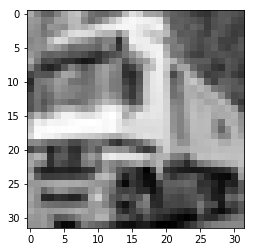

In [160]:
plt.imshow(rgb2gray(train_images[1]))
label_index = int(train_labels[1])
print("It is a "+ class_names[label_index] +".")
plt.show()

It is a automobile.


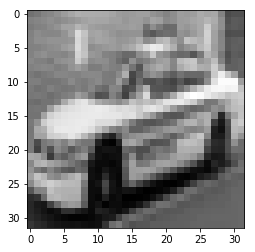

In [171]:
plt.imshow(rgb2gray(train_images[1410]))
label_index = int(train_labels[1410])
print("It is a "+ class_names[label_index] +".")
plt.show()

# Conclusion

In summary, it can be said that both algorithms work better at MNIST. This may be due to the fact that CIFAR contains more information in one image. For example, not only the dog is in the picture, but also the heating. Another reason is the different colour transitions in the pictures. There are many more colours. For example the dog is black, the heater white and the carpet grey. Thus it becomes much more difficult to distinguish or assign the pictures more clearly.
